# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud, STOPWORDS

from tqdm.auto import tqdm
tqdm.pandas()

pd.options.display.max_colwidth = None

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
data = pd.read_csv('E:/Scrapped-Data/InshortsScraped.csv')
print(data.shape)
data.head()

(48110, 8)


,news,national,sports,world,politics,technology,entertainment,hatke
0,"""Modi Modi yes papa,"" Rashtriya Janata Dal pens poem on PM Modi",0,0,0,1,0,0,0
1,"#AyodhyaVerdict becomes world's top Twitter trend with over 630,000 tweets",1,0,1,0,1,0,0
2,#DhoniKeepTheGlove trends as ICC wants Army Sacrifice badge removed,0,1,0,0,0,0,0
3,"#JCBkikhudai memes go viral, company says 'we are truly humbled'",0,0,0,0,0,0,0
4,#Jamal: Bezos tweets Khashoggi memorial pic after reports Saudi prince hacked his phone,0,0,0,0,1,0,0


# EDA

## News Categories and their counts

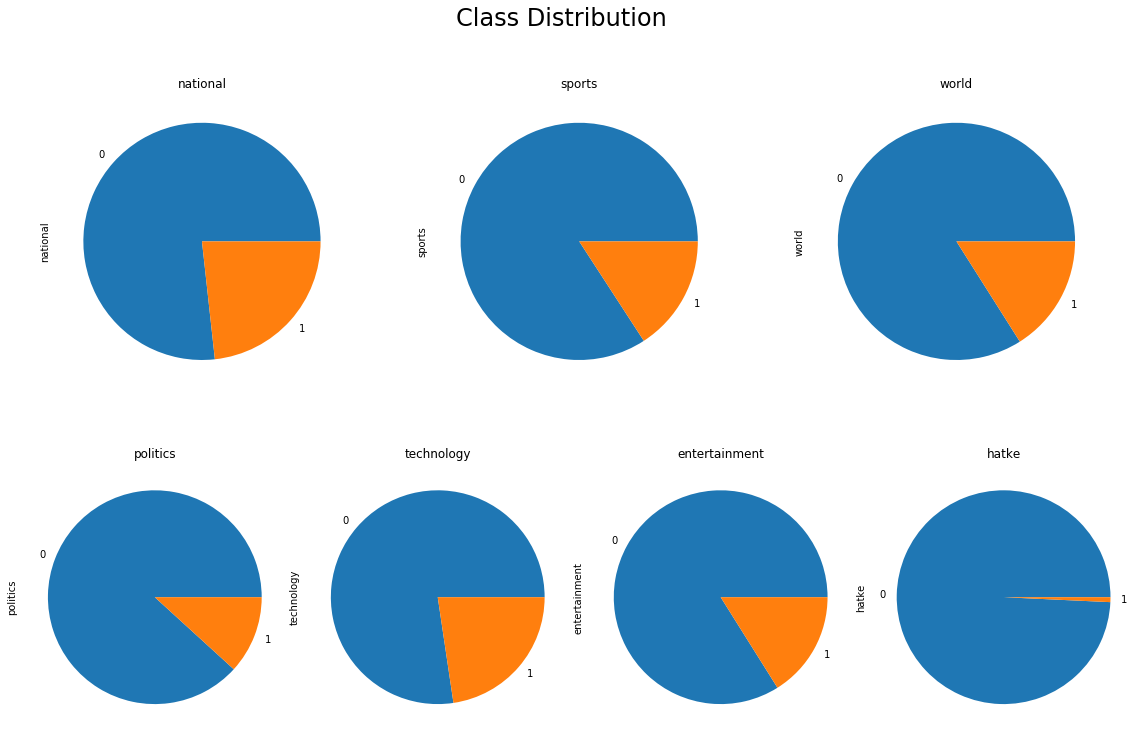

In [3]:
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Class Distribution', fontsize=24)
ax = []

for i in range(3):
    ax.append(plt.subplot2grid((2, 12), (0, i*4), colspan=4))
    
for i in range(4):
    ax.append(plt.subplot2grid((2, 12), (1, i*3), colspan=3))    
    
for i in range(7):
    data.iloc[:, i+1].value_counts().plot.pie(ax=ax[i], title=data.columns[i+1])

## Visualizing most common words

In [4]:
labels = data.columns[1:]

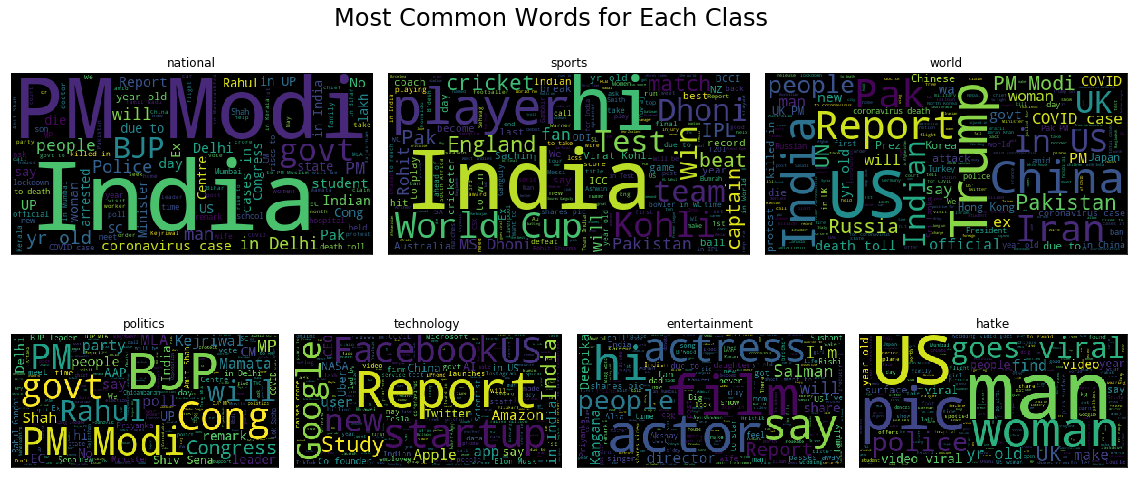

In [5]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Most Common Words for Each Class', fontsize=24)

ax = []

for i in range(3):
    ax.append(plt.subplot2grid((2, 12), (0, i*4), colspan=4))
    
for i in range(4):
    ax.append(plt.subplot2grid((2, 12), (1, i*3), colspan=3))  
    
for i, col in enumerate(labels):
    ax[i].imshow(WordCloud().generate_from_text(' '.join(data[data[col] == 1]['news'].values)))
    ax[i].set_title(col)
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

## Text Cleaning

In [6]:
import sys
sys.path.append('../')

from utils.text import TextCleaner

In [7]:
cleaner = TextCleaner()
data['news_clean'] = cleaner.fit_transform(data['news'].values)
data.head()

,news,national,sports,world,politics,technology,entertainment,hatke,news_clean
0,"""Modi Modi yes papa,"" Rashtriya Janata Dal pens poem on PM Modi",0,0,0,1,0,0,0,modi modi yes papa rashtriya janata dal pen poem modi
1,"#AyodhyaVerdict becomes world's top Twitter trend with over 630,000 tweets",1,0,1,0,1,0,0,ayodhyaverdict becomes world top twitter trend tweet
2,#DhoniKeepTheGlove trends as ICC wants Army Sacrifice badge removed,0,1,0,0,0,0,0,trend icc want army sacrifice badge removed
3,"#JCBkikhudai memes go viral, company says 'we are truly humbled'",0,0,0,0,0,0,0,jcbkikhudai meme viral company say truly humbled
4,#Jamal: Bezos tweets Khashoggi memorial pic after reports Saudi prince hacked his phone,0,0,0,0,1,0,0,jamal bezos tweet khashoggi memorial pic report saudi prince hacked phone


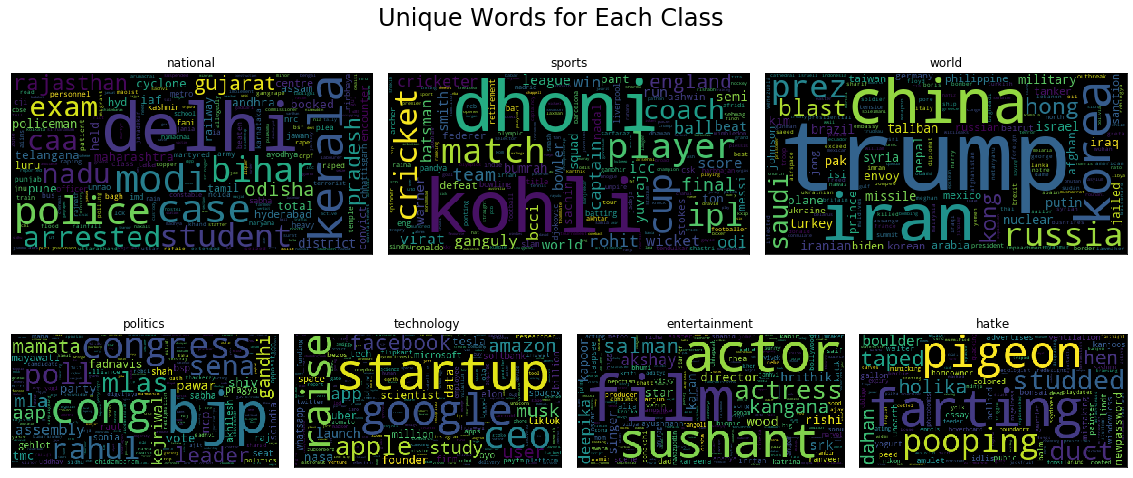

In [8]:
fig = plt.figure(figsize=(20, 8))
fig.suptitle('Unique Words for Each Class', fontsize=24)

ax = []

for i in range(3):
    ax.append(plt.subplot2grid((2, 12), (0, i*4), colspan=4))
    
for i in range(4):
    ax.append(plt.subplot2grid((2, 12), (1, i*3), colspan=3)) 
    
for i, col in enumerate(labels):
    u = Counter(' '.join(data[data[col] == 0]['news_clean'].values).split())
    a = Counter(' '.join(data[data[col] == 1]['news_clean'].values).split())
    ax[i].imshow(WordCloud().generate_from_frequencies(a-u))
    ax[i].set_title(col)
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

## TFIDF Vectorization

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz
import pickle

In [10]:
vectorizer = TfidfVectorizer()
vectorizer.fit(data['news_clean'])
X = vectorizer.transform(data['news_clean'])

Y = data.iloc[:, 1:8].values

print("X shape:", X.shape, "Y shape: ", Y.shape)

X shape: (48110, 24152) Y shape:  (48110, 7)


In [11]:
save_npz('../data/X2.npz', X)
np.save('../data/y2.npy', Y)
pickle.dump(vectorizer, open('../models/TFIDFVectorizer-2.pkl', 'wb'))